In [ ]:
library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "covide-19-dataset"

# *EXPLORATORY DATA ANALYSIS*

In [ ]:
data <- read.csv('/kaggle/input/covide-19-dataset/covid_19_data.csv')
head(data) # To get the first few rows of data

,Date,State,Region,Confirmed,Deaths,Recovered
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,4/29/2020,,Afghanistan,1939,60,252
2,4/29/2020,,Albania,766,30,455
3,4/29/2020,,Algeria,3848,444,1702
4,4/29/2020,,Andorra,743,42,423
5,4/29/2020,,Angola,27,2,7
6,4/29/2020,,Antigua and Barbuda,24,3,11


In [ ]:
str(data)       # To get the structure of the data

'data.frame':	321 obs. of  6 variables:
 $ Date     : chr  "4/29/2020" "4/29/2020" "4/29/2020" "4/29/2020" ...
 $ State    : chr  "" "" "" "" ...
 $ Region   : chr  "Afghanistan" "Albania" "Algeria" "Andorra" ...
 $ Confirmed: int  1939 766 3848 743 27 24 4285 1932 15402 1766 ...
 $ Deaths   : int  60 30 444 42 2 3 214 30 580 23 ...
 $ Recovered: int  252 455 1702 423 7 11 1192 900 12779 1267 ...


In [ ]:
summary(data)   # summary statistics of the data

     Date              State              Region            Confirmed     
 Length:321         Length:321         Length:321         Min.   :     0  
 Class :character   Class :character   Class :character   1st Qu.:   104  
 Mode  :character   Mode  :character   Mode  :character   Median :   653  
                                                          Mean   :  9950  
                                                          3rd Qu.:  4655  
                                                          Max.   :299691  
     Deaths          Recovered     
 Min.   :    0.0   Min.   :     0  
 1st Qu.:    2.0   1st Qu.:     2  
 Median :   12.0   Median :    73  
 Mean   :  709.2   Mean   :  3030  
 3rd Qu.:  144.0   3rd Qu.:   587  
 Max.   :27682.0   Max.   :132929  

In [ ]:
dim(data)        # to get the number of rows and columns

[1] 321   6

In [ ]:
any(is.na(data)) # to check if any null value exist

[1] FALSE

In [ ]:

any(duplicated(data)) # to check if there are any duplicate rows

[1] FALSE

In [ ]:
# -----------------------------
# To get descriptive statistics for all numeric variables
# -----------------------------

numeric_summary <- sapply(data[sapply(data, is.numeric)], function(x) {
 c(
   Mean = mean(x, na.rm = TRUE),
   Median = median(x, na.rm = TRUE),
   Min = min(x, na.rm = TRUE),
   Max = max(x, na.rm = TRUE),
   SD = sd(x, na.rm = TRUE)
 )
})

# -----------------------------
# To Transpose for better readability
# -----------------------------
numeric_summary <- t(numeric_summary)

# -----------------------------
# To display result
# -----------------------------
numeric_summary

,Mean,Median,Min,Max,SD
Confirmed,9949.8006,653,0,299691,31923.853
Deaths,709.1526,12,0,27682,3236.163
Recovered,3030.2773,73,0,132929,14364.870


In [ ]:
unique(data$Region) # To get all unique Countries


[1] "Afghanistan"                      "Albania"                         
  [3] "Algeria"                          "Andorra"                         
  [5] "Angola"                           "Antigua and Barbuda"             
  [7] "Argentina"                        "Armenia"                         
  [9] "Austria"                          "Azerbaijan"                      
 [11] "Bahamas"                          "Bahrain"                         
 [13] "Bangladesh"                       "Barbados"                        
 [15] "Belarus"                          "Belgium"                         
 [17] "Belize"                           "Benin"                           
 [19] "Bhutan"                           "Bolivia"                         
 [21] "Bosnia and Herzegovina"           "Botswana"                        
 [23] "Brazil"                           "Brunei"                          
 [25] "Bulgaria"                         "Burkina Faso"                    
 [27] "Burma"                            "Burundi"                         
 [29] "Cabo Verde"                       "Cambodia"                        
 [31] "Cameroon"                         "Central African Republic"        
 [33] "Chad"                             "Chile"                           
 [35] "Colombia"                         "Congo (Brazzaville)"             
 [37] "Congo (Kinshasa)"                 "Costa Rica"                      
 [39] "Croatia"                          "Cuba"                            
 [41] "Cyprus"                           "Czech Republic"                  
 [43] "Denmark"                          "Diamond Princess"                
 [45] "Djibouti"                         "Dominica"                        
 [47] "Dominican Republic"               "Ecuador"                         
 [49] "Egypt"                            "El Salvador"                     
 [51] "Equatorial Guinea"                "Eritrea"                         
 [53] "Estonia"                          "Eswatini"                        
 [55] "Ethiopia"                         "Fiji"                            
 [57] "Finland"                          "France"                          
 [59] "Gabon"                            "Gambia"                          
 [61] "Georgia"                          "Germany"                         
 [63] "Ghana"                            "Greece"                          
 [65] "Grenada"                          "Guatemala"                       
 [67] "Guinea"                           "Guinea-Bissau"                   
 [69] "Guyana"                           "Haiti"                           
 [71] "Holy See"                         "Honduras"                        
 [73] "Hungary"                          "Iceland"                         
 [75] "India"                            "Indonesia"                       
 [77] "Iran"                             "Iraq"                            
 [79] "Ireland"                          "Israel"                          
 [81] "Italy"                            "Ivory Coast"                     
 [83] "Jamaica"                          "Japan"                           
 [85] "Jordan"                           "Kazakhstan"                      
 [87] "Kenya"                            "Kosovo"                          
 [89] "Kuwait"                           "Kyrgyzstan"                      
 [91] "Laos"                             "Latvia"                          
 [93] "Lebanon"                          "Liberia"                         
 [95] "Libya"                            "Liechtenstein"                   
 [97] "Lithuania"                        "Luxembourg"                      
 [99] "MS Zaandam"                       "Madagascar"                      
[101] "Malawi"                           "Malaysia"                        
[103] "Maldives"                         "Mali"                            
[105] "Malta"                            "Mauritan

In [ ]:
library(dplyr)

data %>%
  count(Region) %>%        # to count rows per unique Region
  arrange(desc(n))         # to sort descending by frequency


Region,n
<chr>,<int>
US,58
Mainland China,31
Canada,15
France,11
UK,11
Australia,8
Netherlands,5
Denmark,3
Afghanistan,1


In [ ]:
# -----------------------------
# Load libraries
# -----------------------------
library(ggplot2)
library(sf)
library(rnaturalearth)
library(rnaturalearthdata)
library(dplyr)


Linking to GEOS 3.10.2, GDAL 3.4.1, PROJ 8.2.1; sf_use_s2() is TRUE




Attaching package: ‘rnaturalearthdata’




The following object is masked from ‘package:rnaturalearth’:

    countries110




In [ ]:
# -----------------------------
# Load libraries
# -----------------------------
library(dplyr)
library(DT)

# -----------------------------
# To get top 50 countries by Confirmed cases
# -----------------------------
top50_table <- data %>%
  filter(!is.na(Confirmed)) %>%           # Remove rows with missing Confirmed values
  arrange(desc(Confirmed)) %>%            # Sort descending by Confirmed
  slice(1:50) %>%                         # Take top 50
  select(Countries = Region, Confirmed)   # Rename column for clarity

# -----------------------------
# To create interactive table
# -----------------------------
datatable(top50_table,
          caption = 'Top 50 Countries by COVID-19 Confirmed Cases',
          options = list(pageLength = 10,
                         autoWidth = TRUE,
                         searching = TRUE))


HTML widgets cannot be represented in plain text (need html)

In [ ]:
# -----------------------------
# To get top 50 countries by Deaths cases
# -----------------------------
top50_table <- data %>%
  filter(!is.na(Deaths)) %>%           # Remove rows with missing Deaths values
  arrange(desc(Deaths)) %>%            # Sort descending by Deaths
  slice(1:50) %>%                         # Take top 50
  select(Countries = Region, Deaths)   # Rename column for clarity
# -----------------------------
# To create interactive table
# -----------------------------
datatable(top50_table,
          caption = 'Top 50 Countries by COVID-19 Death Cases',
          options = list(pageLength = 10,
                         autoWidth = TRUE,
                         searching = TRUE))

HTML widgets cannot be represented in plain text (need html)

In [ ]:
# -----------------------------
# To get 90 countries with the least Deaths cases
# -----------------------------
least90_table <- data %>%
  filter(!is.na(Deaths)) %>%           # Remove rows with missing Deaths values
  arrange(Deaths) %>%                  # Sort ascending by Deaths
  slice(1:90) %>%                      # Take first 90 (least deaths)
  select(Countries = Region, Deaths)   # Rename column for clarity
# -----------------------------
# To create interactive table
# -----------------------------
datatable(least90_table,
          caption = '90 Countries with the Least COVID-19 Death Cases',
          options = list(pageLength = 20,
                         autoWidth = TRUE,
                         searching = FALSE))

HTML widgets cannot be represented in plain text (need html)

In [ ]:
# -----------------------------
# To get top 50 countries by Recovered cases
# -----------------------------
top50_table <- data %>%
  filter(!is.na(Recovered)) %>%           # Remove rows with missing Recovered values
  arrange(desc(Recovered)) %>%            # Sort descending by Recovered
  slice(1:50) %>%                         # Take top 50
  select(Countries = Region, Recovered)   # Rename column for clarity


# -----------------------------
# Create interactive table
# -----------------------------
datatable(top50_table,
          caption = 'Top 50 Countries by COVID-19 Recovered Cases',
          options = list(pageLength = 10,
                         autoWidth = TRUE,
                         searching = FALSE))


HTML widgets cannot be represented in plain text (need html)

# *DATA VISUALIZATION*

Warning message:
“st_centroid assumes attributes are constant over geometries”


Warning message in scale_fill_viridis_c(option = "plasma", trans = "log", na.value = "grey80"):
“log-2.718282 transformation introduced infinite values.”


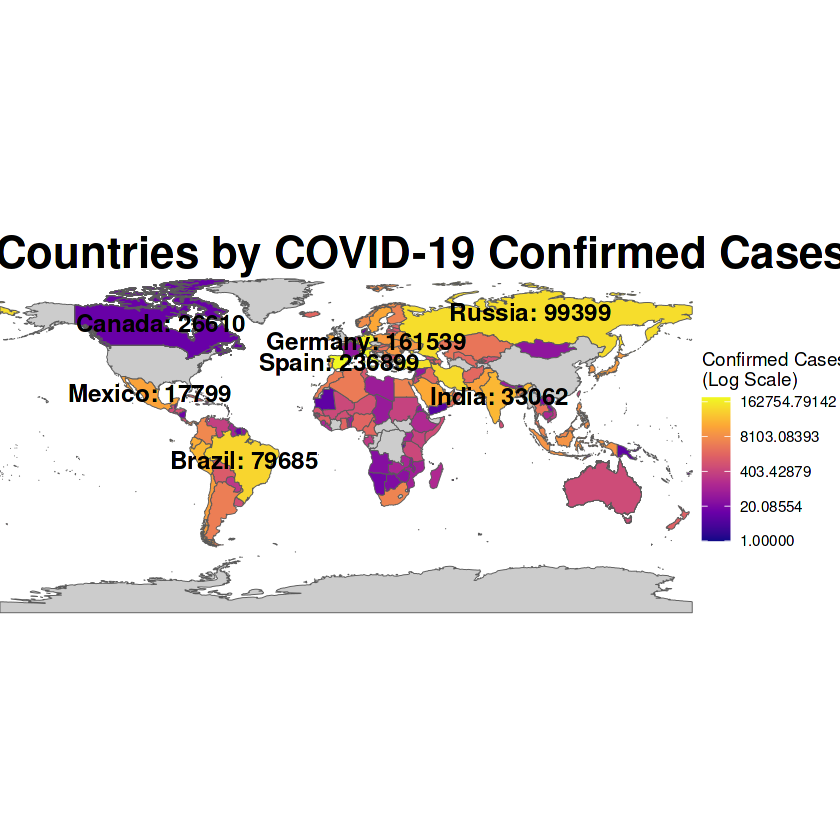

In [ ]:
# -----------------------------
# To load world map
# -----------------------------
world <- ne_countries(scale = "medium", returnclass = "sf")

# -----------------------------
#  To join COVID data with map
# -----------------------------
world_data <- world %>%
  left_join(data, by = c("name" = "Region"))

# -----------------------------
# To calculate centroids for labels
# -----------------------------
centroids <- st_centroid(world_data)

# -----------------------------
# To select top 20 countries by Confirmed cases
# -----------------------------
top20 <- centroids %>%
  filter(!is.na(Confirmed)) %>%
  arrange(desc(Confirmed)) %>%
  slice(1:20)

# -----------------------------
# To add label column: "Country: Confirmed"
# -----------------------------
top20 <- top20 %>%
  mutate(label_text = paste0(name, ": ", Confirmed))

# -----------------------------
# To plot map with top 20 labels
# -----------------------------
ggplot(world_data) +
  geom_sf(aes(fill = Confirmed)) +
  geom_text(data = top20,
            aes(x = st_coordinates(geometry)[,1],
                y = st_coordinates(geometry)[,2],
                label = label_text),
            size = 5,          # bigger label size
            fontface = "bold",
            color = "black",   # high contrast
            check_overlap = TRUE) +
  scale_fill_viridis_c(option = "plasma", trans = "log", na.value = "grey80") +
  labs(title = "Top 20 Countries by COVID-19 Confirmed Cases",
       fill = "Confirmed Cases\n(Log Scale)") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 26, face = "bold") # bigger title
  ) +
  coord_sf(expand = FALSE) # expand map to fit plotting area




Warning message in scale_fill_viridis_c(option = "magma", trans = "log", na.value = "grey80"):
“log-2.718282 transformation introduced infinite values.”


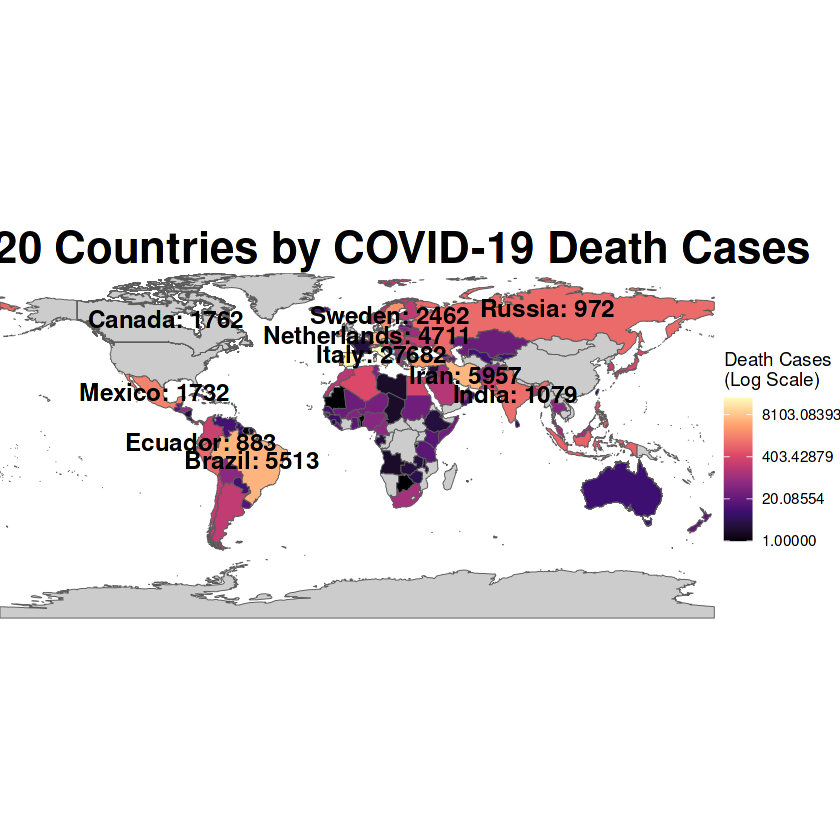

In [ ]:

# -----------------------------
# To select top 20 countries by Deaths cases
# -----------------------------
top20 <- centroids %>%
  filter(!is.na(Deaths)) %>%
  arrange(desc(Deaths)) %>%
  slice(1:20)

# -----------------------------
# To add label column: "Country: Deaths"
# -----------------------------
top20 <- top20 %>%
  mutate(label_text = paste0(name, ": ", Deaths))

# -----------------------------
# To plot map with top 20 labels
# -----------------------------
ggplot(world_data) +
  geom_sf(aes(fill = Deaths)) +
  geom_text(data = top20,
            aes(x = st_coordinates(geometry)[,1],
                y = st_coordinates(geometry)[,2],
                label = label_text),
            size = 5,          # bigger label size
            fontface = "bold",
            color = "black",   # high contrast
            check_overlap = TRUE) +
  scale_fill_viridis_c(option = "magma", trans = "log", na.value = "grey80") +
  labs(title = "Top 20 Countries by COVID-19 Death Cases",
       fill = "Death Cases\n(Log Scale)") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 26, face = "bold") # bigger title
  ) +
  coord_sf(expand = FALSE) # expand map to fit plotting area




Warning message in scale_fill_viridis_c(option = "viridis", trans = "log", na.value = "grey80"):
“log-2.718282 transformation introduced infinite values.”


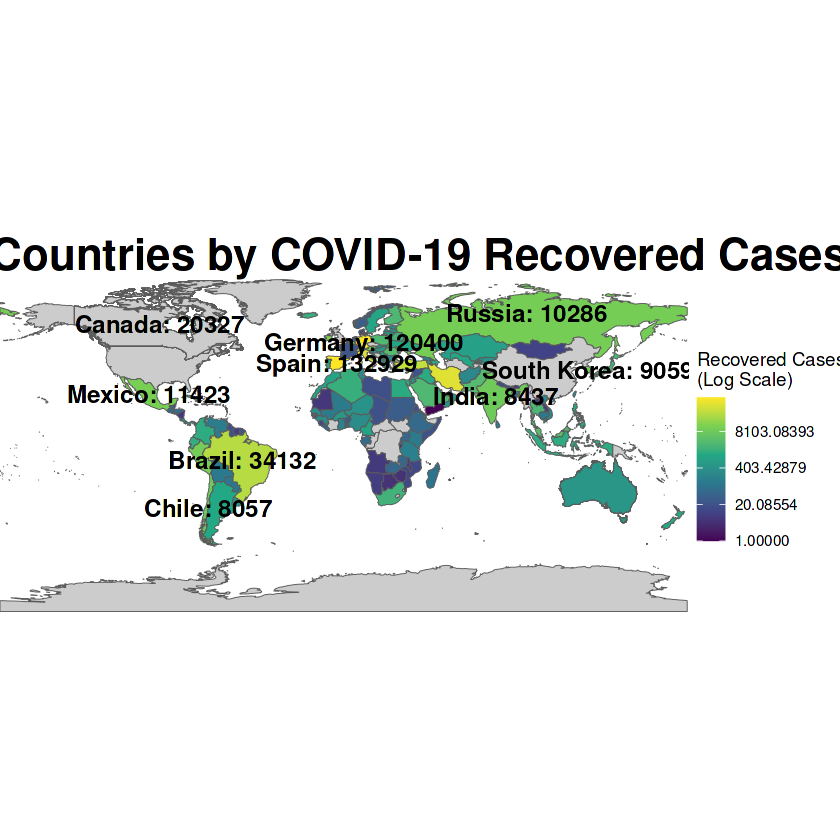

In [ ]:

# -----------------------------
# To select top 20 countries by Recovered cases
# -----------------------------
top20 <- centroids %>%
  filter(!is.na(Recovered)) %>%
  arrange(desc(Recovered)) %>%
  slice(1:20)

# -----------------------------
# To add label column: "Country: Recovered"
# -----------------------------
top20 <- top20 %>%
  mutate(label_text = paste0(name, ": ", Recovered))

# -----------------------------
# To plot map with top 20 labels
# -----------------------------
ggplot(world_data) +
  geom_sf(aes(fill = Recovered)) +
  geom_text(data = top20,
            aes(x = st_coordinates(geometry)[,1],
                y = st_coordinates(geometry)[,2],
                label = label_text),
            size = 5,          # bigger label size
            fontface = "bold",
            color = "black",   # high contrast
            check_overlap = TRUE) +
  scale_fill_viridis_c(option = "viridis", trans = "log", na.value = "grey80") +
  labs(title = "Top 20 Countries by COVID-19 Recovered Cases",
       fill = "Recovered Cases\n(Log Scale)") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 26, face = "bold") # bigger title
  ) +
  coord_sf(expand = FALSE) # expand map to fit plotting area



# *STATISTICAL TESTING*

In [ ]:
# To get the Pearson Correlation
cor.test(data$Confirmed, data$Deaths)



	Pearson's product-moment correlation

data:  data$Confirmed and data$Deaths
t = 38.537, df = 319, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8858031 0.9249010
sample estimates:
      cor 
0.9072936 


**There is a very strong, statistically significant positive correlation between confirmed COVID-19 cases and deaths. In other words, countries or regions with more confirmed cases tend to report proportionally more deaths, with very little chance that this pattern is due to random variation. There we reject the null hypothesis that state that there is no significant correlation between covid19 confirmed cases and deaths  (p<0.05).**

,Confirmed,Deaths,Recovered
Confirmed,1.0000000,0.9072936,0.5960079
Deaths,0.9072936,1.0000000,0.5192948
Recovered,0.5960079,0.5192948,1.0000000


corrplot 0.92 loaded



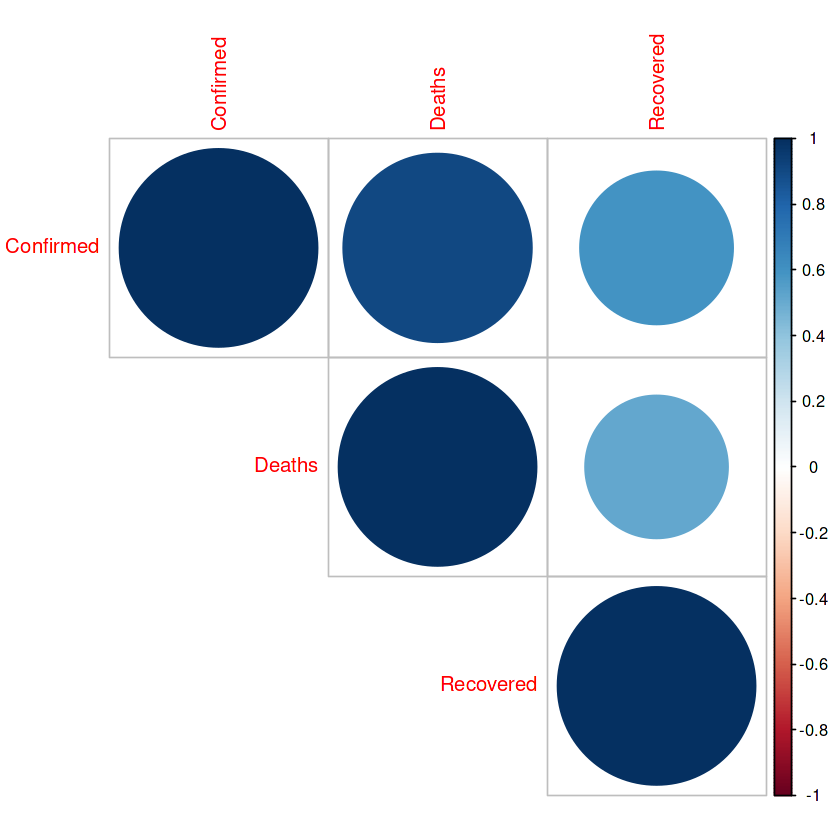

In [ ]:
# To compute correlation matrix
cor(data[, c("Confirmed", "Deaths", "Recovered")], use = "complete.obs")

# To visualize correlation matrix
library(corrplot)
corrplot::corrplot(cor(data[, c("Confirmed", "Deaths", "Recovered")], use = "complete.obs"),
                   method = "circle", type = "upper")